In [1]:
import numpy as np
import pandas as pd
from time import time
from matplotlib import pyplot as plt

In [2]:
class ReadFile:
    def __init__(self,filename):
        self.filename = filename
        f = open(self.filename,'r')
        for line in f:
            break
        self.n = int(line.strip())
        f.close()
        f = open(self.filename)
        lines_count = 0
        for line in f:
            lines_count += 1
        f.close()
        self.lines_count = lines_count
        self.f = open(self.filename,'r')
        return
    
    def get_count(self):
        return self.lines_count//(self.n+2)
    
    def open_file(self):
        self.f.close()
        self.f = open(self.filename,'r')
        return
    
    def close_file(self):
        self.f.close()
        return
    
    def read_block(self):
        lines = [self.f.readline() for i in range(self.n+2)][2:]
        lines = [line.strip().replace('\n','') for line in lines]
        lines = [line.split() for line in lines]
        elements = np.array([line[0] for line in lines])
        xyz = np.array([[float(x) for x in line[1:]] for line in lines])
        return elements,xyz


In [3]:
class Process:
    def __init__(self,elements,xyz):
        self.elements = elements
        self.xyz = xyz
        return
    
    def get_distance(self):
        mean_o = self.mean(self.elements,self.xyz,'O')
        mean_c = self.mean(self.elements,self.xyz,'C')
        distance = np.linalg.norm(mean_o-mean_c)
        return distance
    
    def mean(self,elements,xyz,target):
        index = np.where(elements == target)
        return xyz[index].mean(axis=0)
    
    def get_density(self):
        mean_global = self.xyz.mean(axis=0)
        return

In [4]:
START = time()
read_file = ReadFile('ethyl-dropletB-pos-1.xyz')
END = time()
print(END-START)
read_file.get_count()

108.21571326255798


180001

In [5]:
START = time()
k = 100
N = read_file.get_count()
read_file.open_file()
distances = [0]*N
for i in range(N):
    if i % (N/k) < 1:
        print('{:6.2f}%'.format(i/N*100))
    elements,xyz = read_file.read_block()
    process = Process(elements,xyz)
    distances[i] = process.get_distance()
read_file.close_file()
END = time()
print(END-START)

  0.00%
  1.00%
  2.00%
  3.00%
  4.00%
  5.00%
  6.00%
  7.00%
  8.00%
  9.00%
 10.00%
 11.00%
 12.00%
 13.00%
 14.00%
 15.00%
 16.00%
 17.00%
 18.00%
 19.00%
 20.00%
 21.00%
 22.00%
 23.00%
 24.00%
 25.00%
 26.00%
 27.00%
 28.00%
 29.00%
 30.00%
 31.00%
 32.00%
 33.00%
 34.00%
 35.00%
 36.00%
 37.00%
 38.00%
 39.00%
 40.00%
 41.00%
 42.00%
 43.00%
 44.00%
 45.00%
 46.00%
 47.00%
 48.00%
 49.00%
 50.00%
 51.00%
 52.00%
 53.00%
 54.00%
 55.00%
 56.00%
 57.00%
 58.00%
 59.00%
 60.00%
 61.00%
 62.00%
 63.00%
 64.00%
 65.00%
 66.00%
 67.00%
 68.00%
 69.00%
 70.00%
 71.00%
 72.00%
 73.00%
 74.00%
 75.00%
 76.00%
 77.00%
 78.00%
 79.00%
 80.00%
 81.00%
 82.00%
 83.00%
 84.00%
 85.00%
 86.00%
 87.00%
 88.00%
 89.00%
 90.00%
 91.00%
 92.00%
 93.00%
 94.00%
 95.00%
 96.00%
 97.00%
 98.00%
 99.00%
1056.5832397937775


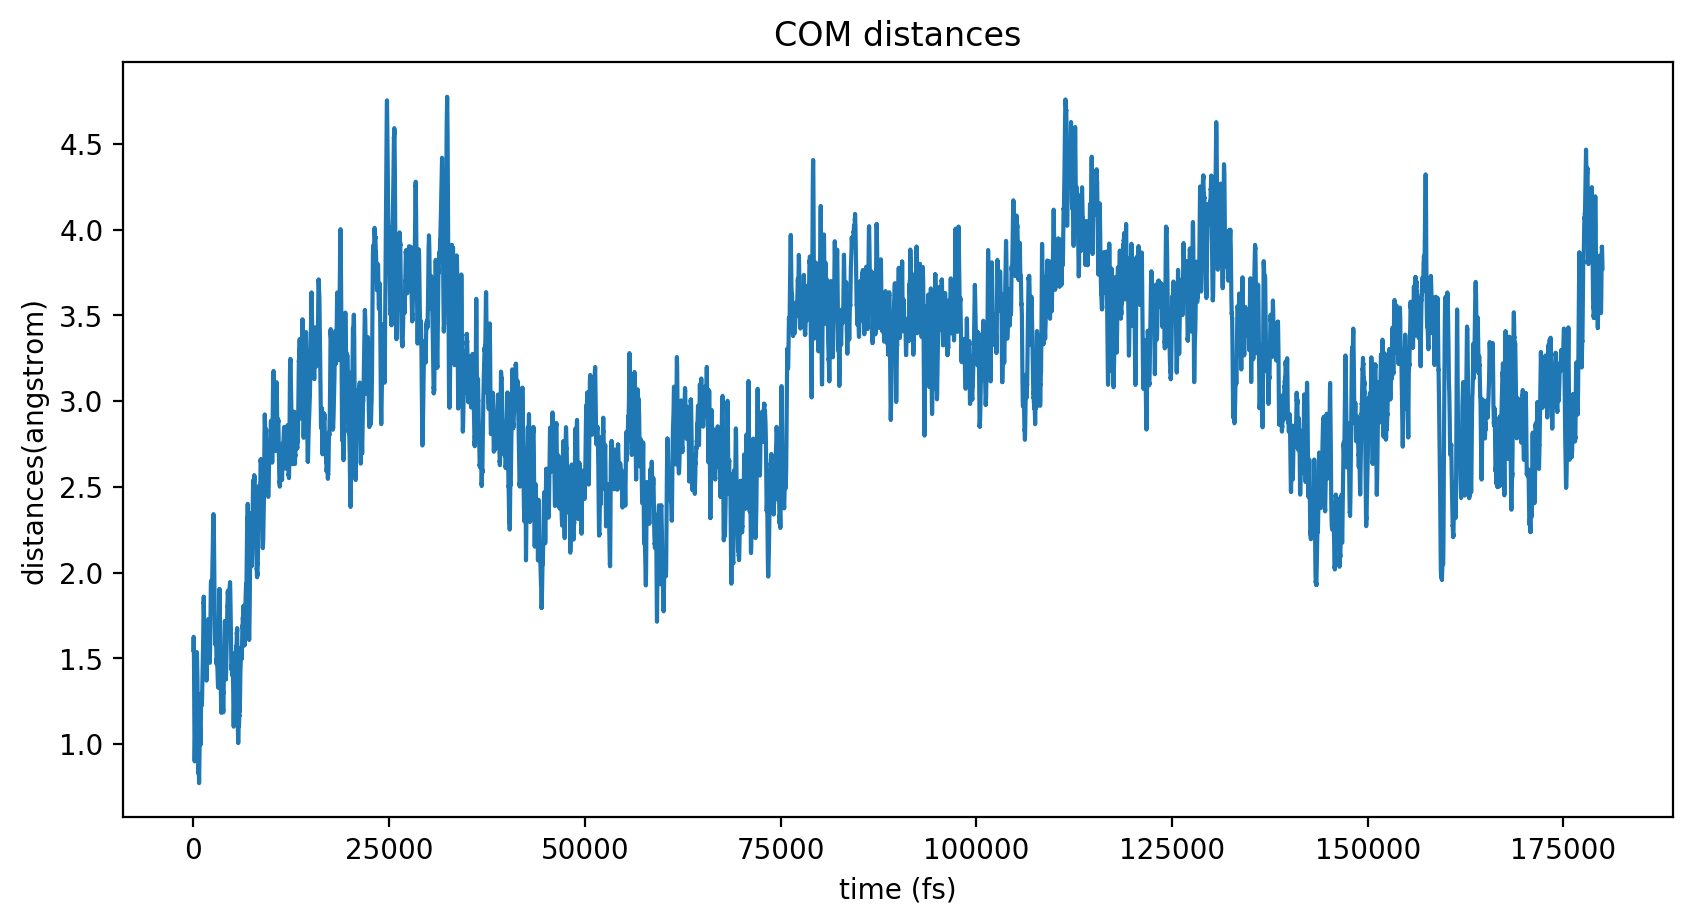

In [6]:
plt.figure(figsize=(10,5),dpi=200)
plt.title('COM distances')
plt.xlabel('time (fs)')
plt.ylabel('distances(angstrom)')
plt.plot(distances)
plt.show()